In [1]:
import os
import warnings
os.chdir("/home/hania/mi2/ai-stretegies-papers-regulations-monitoring/")

In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)
# !python3 -m spacy download en_core_web_sm
# !which python

/home/hania/mi2/ai-stretegies-papers-regulations-monitoring/.venv/bin/python
3.7.1 (default, Jul 16 2021, 17:39:59) 
[GCC 9.3.0]
sys.version_info(major=3, minor=7, micro=1, releaselevel='final', serial=0)


In [4]:
import spacy
import os
from mars.scraper.utils import parse_article
from collections import defaultdict, Counter
from mars.scraper.utils import parse_article
import numpy as np
from collections import defaultdict

warnings.filterwarnings('ignore')

nlp = spacy.load('en_core_web_sm')
texts = defaultdict(lambda: defaultdict(dict))

In [5]:
newspaper_counts = []
for filename in os.listdir("./data/oecd_html"):
    try:
        res = parse_article("./data/oecd_html" + "/" + filename)
        doc = nlp(res["text"])
        texts[filename]["newspaper3k"]["doc"] = doc
        newspaper_counts.append(len(doc))
        texts[filename]["newspaper3k"]["len"] = len(doc)
    except:
        print("failed %s" %filename)

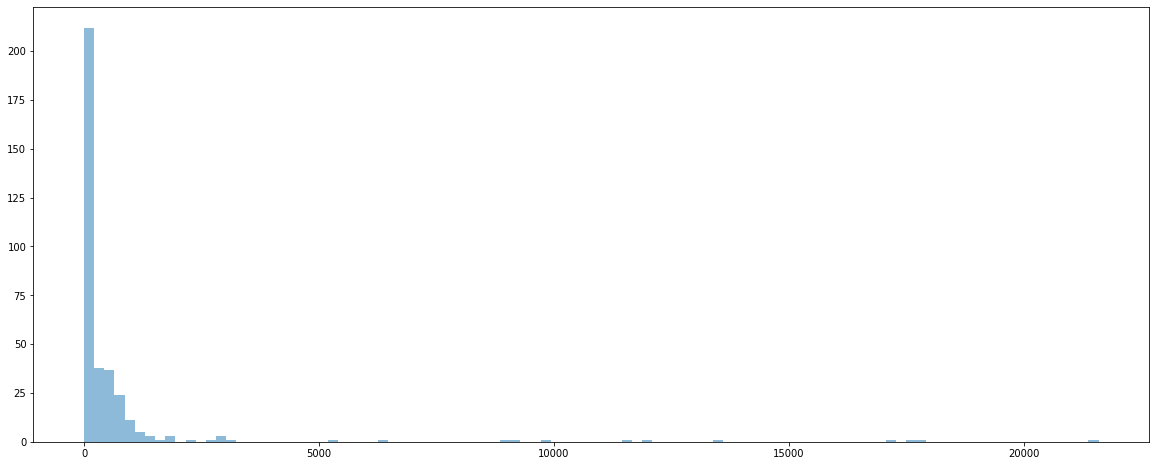

In [6]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [20, 8]
plt.hist(newspaper_counts, alpha=0.5, bins = 100)
plt.show()

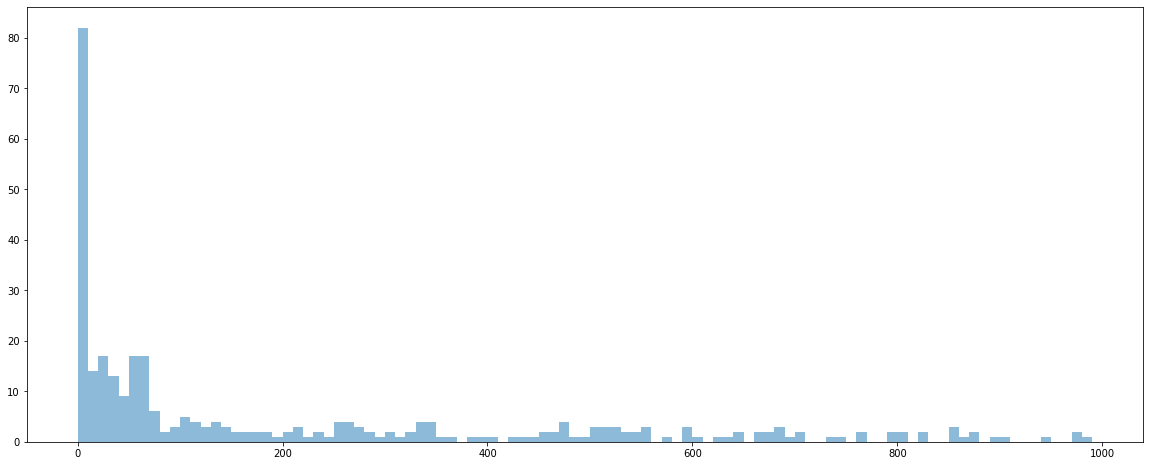

In [7]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.hist(newspaper_counts, alpha=0.5, bins = np.arange(0,1000,10))
plt.show()

# dragnet

In [8]:
import dragnet

In [9]:
content_counts = []
for filename in os.listdir("./data/oecd_html"):
    try:
        with open("./data/oecd_html" + "/" + filename) as f:
            content = f.read()
            
        content = dragnet.extract_content(content)     
        doc = nlp(content)
        texts[filename]["dragnet"]["doc"] = doc
        content_counts.append(len(doc))
        texts[filename]["dragnet"]["len"] = len(doc)
    except:
        print("failed %s" %filename)

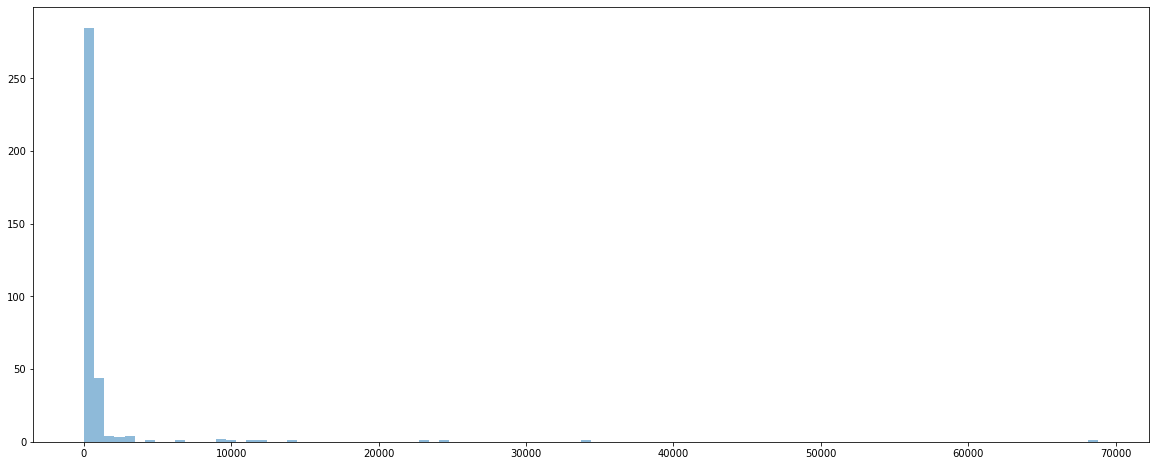

In [10]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.hist(content_counts, alpha=0.5, bins = 100)
plt.show()

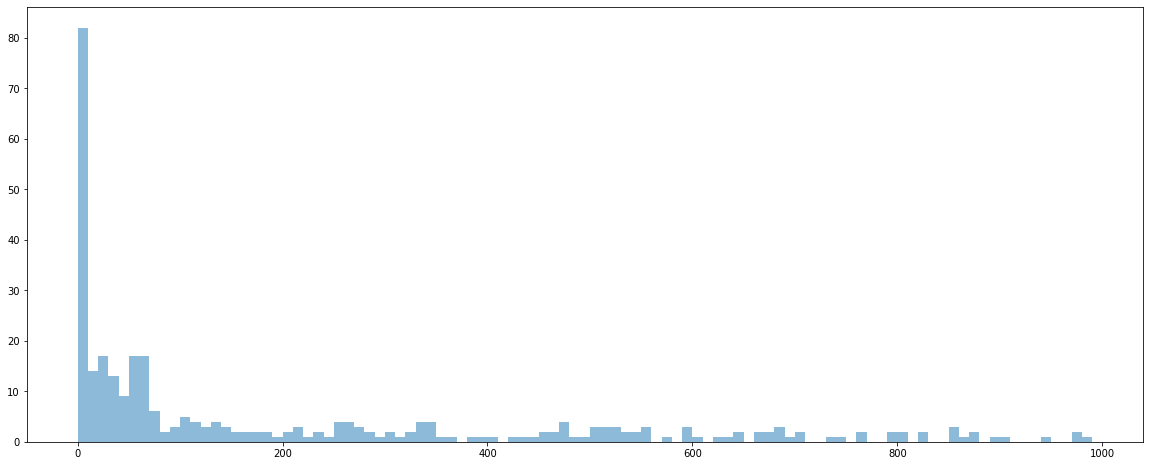

In [11]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.hist(newspaper_counts, alpha=0.5, bins = np.arange(0,1000,10))
plt.show()

In [16]:
lens = {}

In [20]:
for key in texts.keys():
    try:
        lens[key] = abs(texts[key]["dragnet"]["len"] - texts[key]["newspaper3k"]["len"])
    except:
        print("failed %s" %key)

In [21]:
s = sorted(lens.items(), key=lambda item: item[1])
s

[('223.html', 0),
 ('585.html', 0),
 ('430.html', 0),
 ('54.html', 0),
 ('4.html', 0),
 ('57.html', 0),
 ('595.html', 0),
 ('196.html', 0),
 ('486.html', 0),
 ('79.html', 0),
 ('467.html', 0),
 ('2.html', 0),
 ('262.html', 0),
 ('602.html', 0),
 ('524.html', 0),
 ('29.html', 0),
 ('61.html', 0),
 ('352.html', 0),
 ('591.html', 0),
 ('110.html', 0),
 ('418.html', 0),
 ('32.html', 0),
 ('605.html', 0),
 ('317.html', 0),
 ('250.html', 0),
 ('217.html', 0),
 ('363.html', 0),
 ('532.html', 0),
 ('198.html', 0),
 ('50.html', 0),
 ('273.html', 0),
 ('441.html', 0),
 ('475.html', 0),
 ('70.html', 0),
 ('496.html', 0),
 ('53.html', 0),
 ('25.html', 0),
 ('360.html', 0),
 ('552.html', 0),
 ('168.html', 0),
 ('259.html', 0),
 ('499.html', 0),
 ('46.html', 0),
 ('143.html', 0),
 ('402.html', 0),
 ('428.html', 0),
 ('90.html', 0),
 ('588.html', 0),
 ('346.html', 0),
 ('164.html', 0),
 ('427.html', 0),
 ('411.html', 0),
 ('476.html', 0),
 ('228.html', 1),
 ('530.html', 1),
 ('226.html', 1),
 ('229.h

In [22]:
import pandas as pd
oecd = pd.read_csv("./oecd.csv", index_col=0)

## Porównanie

In [28]:
filename = s[-1][0]
print(filename)
print("word diff %s" % lens[filename])
print("newspaper3k: %s, dragnet %s" %(texts[filename]["newspaper3k"]["len"], texts[filename]["dragnet"]["len"]))

545.html
word diff 51309
newspaper3k: 17528, dragnet 68837


In [24]:
print(texts[filename]["dragnet"]["doc"])

Fairness is a highly prized human value. Societies in which individuals can flourish need to be held together by practices and institutions that are regarded as fair. What it means to be fair has been much debated throughout history, rarely more so than in recent months. Issues such as the global Black Lives Matter movement, the “levelling up” of regional inequalities within the UK, and the many complex questions of fairness raised by the COVID-19 pandemic have kept fairness and equality at the centre of public debate.
Inequality and unfairness have complex causes, but bias in the decisions that organisations make about individuals is often a key aspect. The impact of efforts to address unfair bias in decision-making have often either gone unmeasured or have been painfully slow to take effect. However, decision-making is currently going through a period of change. Use of data and automation has existed in some sectors for many years, but it is currently expanding rapidly due to an expl

In [25]:
print(texts[filename]["newspaper3k"]["doc"])

Preface

Fairness is a highly prized human value. Societies in which individuals can flourish need to be held together by practices and institutions that are regarded as fair. What it means to be fair has been much debated throughout history, rarely more so than in recent months. Issues such as the global Black Lives Matter movement, the “levelling up” of regional inequalities within the UK, and the many complex questions of fairness raised by the COVID-19 pandemic have kept fairness and equality at the centre of public debate.

Inequality and unfairness have complex causes, but bias in the decisions that organisations make about individuals is often a key aspect. The impact of efforts to address unfair bias in decision-making have often either gone unmeasured or have been painfully slow to take effect. However, decision-making is currently going through a period of change. Use of data and automation has existed in some sectors for many years, but it is currently expanding rapidly due 

In [36]:
tmp = oecd.loc[int(filename[:-5])]
print(tmp["documentUrl"])
tmp

https://www.gov.uk/government/publications/cdei-publishes-review-into-bias-in-algorithmic-decision-making/main-report-cdei-review-into-bias-in-algorithmic-decision-making


title            REVIEW INTO BIAS IN ALGORITHMIC DECISION-MAKING
country                                           United Kingdom
documentUrl    https://www.gov.uk/government/publications/cde...
startDate                                                 2020.0
endDate                                                      NaN
oecdId                                                     26980
Name: 545, dtype: object

In [41]:
filename = s[-2][0]
print(filename)
print("word diff %s" % lens[filename])
print("newspaper3k: %s, dragnet %s" %(texts[filename]["newspaper3k"]["len"], texts[filename]["dragnet"]["len"]))

425.html
word diff 16028
newspaper3k: 17888, dragnet 33916


In [42]:
print(texts[filename]["dragnet"]["doc"])

Ministerial foreword
When I became Digital Secretary, I vowed to be unashamedly pro-tech. This has to begin with data. Data is now the driving force of the world’s modern economies. It fuels innovation in businesses large and small, and has been a lifeline during the global coronavirus pandemic. The fact that governments, businesses, organisations and public services were able to share vital information quickly, efficiently and ethically during the pandemic has not only saved countless lives, but has enabled us to work from home, keep the economy running and stay connected with loved ones during a period of unprecedented disruption. As we enter into recovery, it is vital that we make the most of what we have learnt.
This National Data Strategy aims to do exactly that, building on our manifesto pledge to improve data use in government, and going further. It seeks to maintain the high watermark of data use set during the pandemic, and to free up businesses and organisations to keep using

In [43]:
print(texts[filename]["newspaper3k"]["doc"])

Ministerial foreword

When I became Digital Secretary, I vowed to be unashamedly pro-tech. This has to begin with data. Data is now the driving force of the world’s modern economies. It fuels innovation in businesses large and small, and has been a lifeline during the global coronavirus pandemic. The fact that governments, businesses, organisations and public services were able to share vital information quickly, efficiently and ethically during the pandemic has not only saved countless lives, but has enabled us to work from home, keep the economy running and stay connected with loved ones during a period of unprecedented disruption. As we enter into recovery, it is vital that we make the most of what we have learnt.

This National Data Strategy aims to do exactly that, building on our manifesto pledge to improve data use in government, and going further. It seeks to maintain the high watermark of data use set during the pandemic, and to free up businesses and organisations to keep usi

In [44]:
tmp = oecd.loc[int(filename[:-5])]
print(tmp["documentUrl"])
tmp

https://www.gov.uk/government/publications/uk-national-data-strategy/national-data-strategy


title                                     NATIONAL DATA STRATEGY
country                                           United Kingdom
documentUrl    https://www.gov.uk/government/publications/uk-...
startDate                                                 2020.0
endDate                                                      NaN
oecdId                                                     27018
Name: 425, dtype: object

In [45]:
filename = s[-3][0]
print(filename)
print("word diff %s" % lens[filename])
print("newspaper3k: %s, dragnet %s" %(texts[filename]["newspaper3k"]["len"], texts[filename]["dragnet"]["len"]))

31.html
word diff 12228
newspaper3k: 26, dragnet 12254


In [46]:
print(texts[filename]["dragnet"]["doc"])

Samhället och AI Samverkan mellan människor och AI Tillämpningar av AI
This live online executive short course provides you with an understanding of AI technologies and application opportunities in order to enable you to evaluate the needs and demands of AI processes. It explains how to make a profitable start and understand what you as a business manager need to know in order to guide your organisation into new opportunities based on AI technologies. It will also demonstrate how AI is changing the business landscape, giving you the tools to ask the right questions and find out how you can use AI to your advantage. Read more at ROYAL INSTITUTE OF TECHNOLOGY (KTH)
Computer Vision Intelligent Agents and Multi-agent Systems Machine Learning Mathematics and statistics
In this course, we will introduce you to the fundamentals of sensor fusion for automotive systems. Key concepts involve Bayesian statistics and how to recursively estimate parameters of interest using a range of different sen

In [47]:
print(texts[filename]["newspaper3k"]["doc"])

Scroll to find your event or course.

Don't you know what you are looking for? Use our competence guide that explains.


In [48]:
tmp = oecd.loc[int(filename[:-5])]
print(tmp["documentUrl"])
tmp

https://ai-competence.se/en/


title              AI COMPETENCE FOR SWEDEN
country                              Sweden
documentUrl    https://ai-competence.se/en/
startDate                            2018.0
endDate                                 NaN
oecdId                                26630
Name: 31, dtype: object

In [49]:
filename = s[-4][0]
print(filename)
print("word diff %s" % lens[filename])
print("newspaper3k: %s, dragnet %s" %(texts[filename]["newspaper3k"]["len"], texts[filename]["dragnet"]["len"]))

543.html
word diff 6880
newspaper3k: 11589, dragnet 4709


In [50]:
print(texts[filename]["dragnet"]["doc"])

on intellectual property rights for the development of artificial intelligence technologies
–   having regard to the Treaty on the Functioning of the European Union (TFEU), in particular Articles 4, 16, 26, 114 and 118 thereof,
–   having regard to the Berne Convention for the Protection of Literary and Artistic Works,
–   having regard to the Interinstitutional Agreement of 13 April 2016 on Better Law-Making [1] and the Commission’s Better Regulations Guidelines ( COM(2015)0215 ),
–   having regard to the World Intellectual Property Organisation (WIPO) Copyright Treaty, the WIPO Performances and Phonograms Treaty and the WIPO revised Issues Paper of 29 May 2020 on Intellectual Property Policy and Artificial Intelligence,
–   having regard to Directive (EU) 2019/790 of the European Parliament and of the Council of 17 April 2019 on copyright and related rights in the Digital Single Market and amending Directives 96/9/EC and 2001/29/EC [2] ,
–   having regard to Directive 96/9/EC of the 

In [51]:
print(texts[filename]["newspaper3k"]["doc"])

Procedure : 2020/2015(INI) Document stages in plenary Document selected : A9-0176/2020 Texts tabled : A9-0176/2020

Debates : PV 19/10/2020 - 18

CRE 19/10/2020 - 15

CRE 19/10/2020 - 18

Votes : PV 20/10/2020 - 17

PV 20/10/2020 - 21

Texts adopted : P9_TA(2020)0277



<Date> {02/10/2020} 2.10.2020 </Date> <NoDocSe> A9-0176/2020 </NoDocSe> 232k 98k <TitreType>REPORT</TitreType> <Titre>on intellectual property rights for the development of artificial intelligence technologies</Titre> <DocRef>(2020/2015(INI))</DocRef>

<Commission>{JURI}Committee on Legal Affairs</Commission> Rapporteur: <Depute>Stéphane Séjourné</Depute> MOTION FOR A EUROPEAN PARLIAMENT RESOLUTION EXPLANATORY STATEMENT OPINION OF THE COMMITTEE ON THE INTERNAL MARKET AND CONSUMER PROTECTION OPINION OF THE COMMITTEE ON TRANSPORT AND TOURISM OPINION OF THE COMMITTEE ON CULTURE AND EDUCATION INFORMATION ON ADOPTION IN COMMITTEE RESPONSIBLE FINAL VOTE BY ROLL CALL IN COMMITTEE RESPONSIBLE

MOTION FOR A EUROPEAN PARLIAMENT R

In [52]:
tmp = oecd.loc[int(filename[:-5])]
print(tmp["documentUrl"])
tmp

https://www.europarl.europa.eu/doceo/document/A-9-2020-0176_EN.html


title          RESOLUTION ON INTELLECTUAL PROPERTY RIGHTS FOR...
country                                           European Union
documentUrl    https://www.europarl.europa.eu/doceo/document/...
startDate                                                 2020.0
endDate                                                      NaN
oecdId                                                     27011
Name: 543, dtype: object

In [53]:
filename = s[-5][0]
print(filename)
print("word diff %s" % lens[filename])
print("newspaper3k: %s, dragnet %s" %(texts[filename]["newspaper3k"]["len"], texts[filename]["dragnet"]["len"]))

120.html
word diff 5743
newspaper3k: 17227, dragnet 22970


In [54]:
print(texts[filename]["dragnet"]["doc"])

Date introduced:  31 July 2019 House:  House of Representatives Portfolio:  Home Affairs and Foreign Affairs and Trade Commencement:  Both Bills commence the day after Royal Assent.
Links: The links to the Bills, their Explanatory Memorandum and second reading speech can be found on the Bill’s home page for the Identity-matching Services Bill 2019 and Australian Passports Amendment (Identity-matching Services) Bill 2019 , or through the Australian Parliament website .
When Bills have been passed and have received Royal Assent, they become Acts, which can be found at the Federal Register of Legislation website .
All hyperlinks in this Bills Digest are correct as at August 2019.
The Bills Digest at a glance
Purpose of the Bills The Identity-matching Services Bill 2019 (IMS Bill) authorises the Department of Home Affairs (DOHA) to create and maintain facilities for the sharing of facial images and other identity information between government agencies, and in some cases, private organisat

In [55]:
print(texts[filename]["newspaper3k"]["doc"])

Bills Digest No. 21, 2019–20

PDF version [869KB]

Claire Petrie

Law and Bills Digest Section

26 August 2019

Contents

The Bills Digest at a glance

History of the Bill

Purpose of the Bill

Structure of the Bill

Background

Committee consideration

Policy position of non-government parties/independents

Position of major interest groups

Financial implications

Statement of Compatibility with Human Rights

Key issues and provisions

Date introduced: 31 July 2019

House: House of Representatives

Portfolio: Home Affairs and Foreign Affairs and Trade

Commencement: Both Bills commence the day after Royal Assent.

Links: The links to the Bills, their Explanatory Memorandum and second reading speech can be found on the Bill’s home page for the Identity-matching Services Bill 2019 and Australian Passports Amendment (Identity-matching Services) Bill 2019, or through the Australian Parliament website.

When Bills have been passed and have received Royal Assent, they become Acts, which ca

In [56]:
tmp = oecd.loc[int(filename[:-5])]
print(tmp["documentUrl"])
tmp

https://www.aph.gov.au/Parliamentary_Business/Bills_Legislation/bd/bd1920a/20bd021


title                 AUSTRALIAN IDENTITY-MATCHING SERVICES BILL
country                                                Australia
documentUrl    https://www.aph.gov.au/Parliamentary_Business/...
startDate                                                 2019.0
endDate                                                      NaN
oecdId                                                     26841
Name: 120, dtype: object